In [1]:
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import sklearn
import keras
import matplotlib
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv1D,Embedding,LSTM,BatchNormalization,GlobalMaxPooling1D,MaxPooling1D,Dropout,Conv2D,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
import csv
from keras import layers
import torch
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot as plt
import tensorflow as tf


In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Tong00020/NLP---2024/main/output.csv')
df_train.head()

,Unnamed: 0,review_text,polarity
0,0,curtindo,1.0
1,1,aplicativo absurdamente caro valor tornar prêm...,0.0
2,2,simples novo layout,1.0
3,3,estava problema acessar porém consegui resolve...,1.0
4,4,gostei jogo celular celular anos ainda parabén...,1.0


In [3]:
df_train.dropna(inplace = True)

In [4]:
df_train[['review_text','polarity']]

,review_text,polarity
0,curtindo,1.0
1,aplicativo absurdamente caro valor tornar prêm...,0.0
2,simples novo layout,1.0
3,estava problema acessar porém consegui resolve...,1.0
4,gostei jogo celular celular anos ainda parabén...,1.0
...,...,...
968852,banido injustamente,0.0
968853,legal,1.0
968854,assim ficar dentro situação bolsa família gostei,1.0
968856,excelente aplicativo treinar conhecimentos ing...,1.0


In [5]:
data = df_train.head(15000)

In [6]:
df_text_s = data[["review_text", "polarity"]]

In [7]:
train, test = train_test_split(df_text_s, test_size=0.2)

In [8]:
train['polarity'] = pd.Categorical(train['polarity'])
y_train_int = train['polarity'].cat.codes

test['polarity'] = pd.Categorical(test['polarity'])
y_test_int = test['polarity'].cat.codes

In [9]:
y_train = to_categorical(y_train_int)
y_test = to_categorical(y_test_int)

In [10]:
to_train = train['review_text'].to_list()

to_test = test['review_text'].to_list()

vocabulary = {}
vocabulary_test = {}

for i in range(0,len(to_train)):
      for word in to_train[i].split():
          if word not in vocabulary:
              vocabulary[word] = 1
          else:
              vocabulary[word]+=1

for i in range(0,len(to_test)):
    to_test[i] = to_test[i].lower()
    for word in to_test[i].split():
        if word not in vocabulary_test:
            vocabulary_test[word] = 1
        else:
            vocabulary_test[word]+=1

In [11]:
vocab_size = len(vocabulary)
vocab_size_test = len(vocabulary_test)

tokenizer = Tokenizer(num_words = vocab_size,lower=True)
tokenizer_test = Tokenizer(num_words = vocab_size_test,lower=True)

tokenizer.fit_on_texts(train['review_text'])
train_sequences = tokenizer.texts_to_sequences(train['review_text'])

tokenizer.fit_on_texts(test['review_text'])
test_sequences = tokenizer.texts_to_sequences(test['review_text'])

In [12]:
max_len = 21
n = 32
train_padded = pad_sequences(train_sequences,maxlen=max_len,padding='post',truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [13]:
X = data['review_text'].values
y = data['polarity'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

#LSTM

In [17]:
number_of_neurons_layer1 = 60

In [73]:
model = Sequential()
model.add(layers.Dense(number_of_neurons_layer1, input_dim=X_train.shape[1], activation='tanh', use_bias = True, bias_initializer='ones'))
model.add(layers.Embedding(input_dim = X_train.shape[1], output_dim = n))
model.add(LSTM(4,activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.add(layers.Dense(1, activation='sigmoid'))

sgd = SGD(learning_rate=0.001)
model.compile(loss="binary_crossentropy",optimizer=sgd,metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                244080    
                                                                 
 embedding_3 (Embedding)     (None, 20, 32)            390496    
                                                                 
 lstm_3 (LSTM)               (None, 4)                 592       
                                                                 
 activation_9 (Activation)   (None, 4)                 0         
                                                                 
 batch_normalization_3 (Bat  (None, 4)                 16        
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 256)               1280      
                                                      

In [74]:
import os
import sys
import graphviz
import pydot_ng
import pydot
from tensorflow.python.keras.utils.io_utils import path_to_string
from tensorflow.python.util import nest
from tensorflow.python.util.tf_export import keras_export
from tensorflow.python.keras.engine import sequential
import tensorflow as tf
import pydot
from tensorflow.python.keras.engine import functional

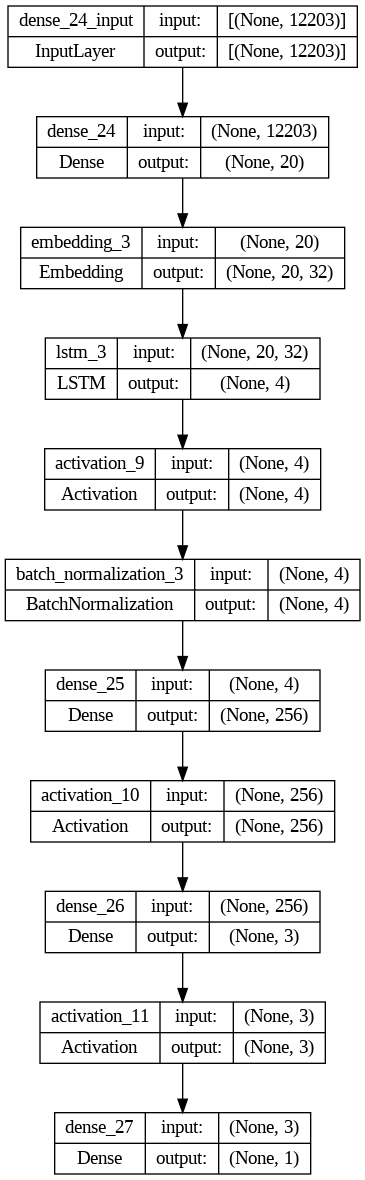

In [75]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [76]:
history_fine = model.fit(X_train, y_train,epochs=50,verbose=False,validation_data=(X_val, y_val),batch_size=X_train.shape[0])

In [77]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Train Accuracy: %0.2f' % (accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Test Accuracy: %0.2f' % (accuracy))

Train Accuracy: 0.75
Test Accuracy: 0.76


In [78]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))

94/94 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       721
         1.0       0.76      1.00      0.86      2279

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


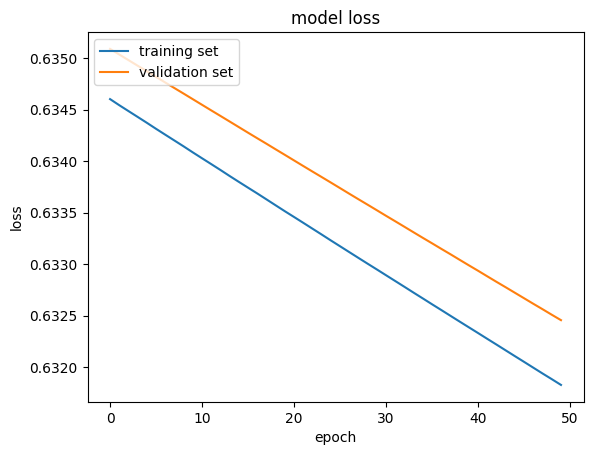

In [79]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']


plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

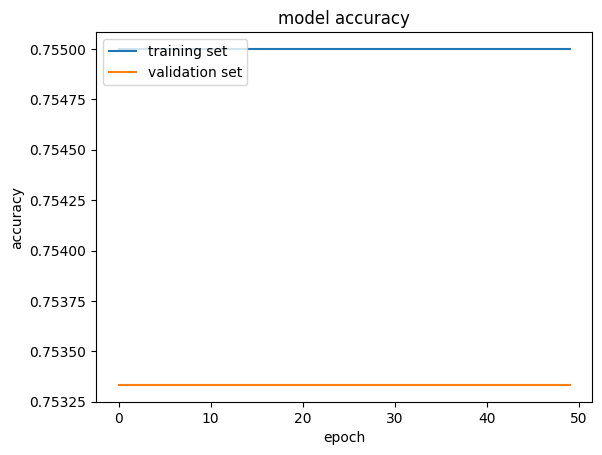

In [80]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [82]:
sentence = ["simples novo layout"]
sentence = vectorizer.transform(sentence)
if model.predict(sentence) > 0.5 :
  print("The phase is classified as Positive")
else:
  print("The phase is classified as Negative")
model.predict(sentence)

1/1 [==============================] - 0s 18ms/step
The phase is classified as Positive
1/1 [==============================] - 0s 21ms/step


array([[0.56891507]], dtype=float32)

# Deep Neural Network

In [83]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10

In [84]:
model = Sequential()
model.add(layers.Dense(number_of_neurons_layer1, input_dim=X_train.shape[1], activation='tanh', use_bias = True, bias_initializer='ones'))
model.add(layers.Dense(number_of_neurons_layer2, activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

sgd = SGD(learning_rate=0.001)
model.compile(loss="binary_crossentropy",optimizer=sgd,metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 20)                244080    
                                                                 
 dense_29 (Dense)            (None, 10)                210       
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 244301 (954.30 KB)
Trainable params: 244301 (954.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


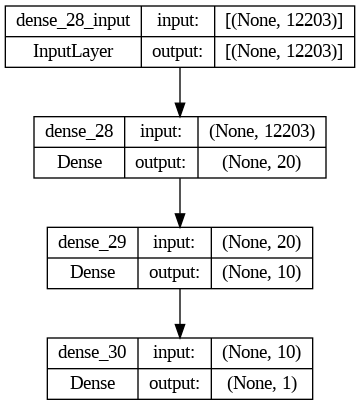

In [85]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [86]:
history_fine = model.fit(X_train, y_train,epochs=50,verbose=False,validation_data=(X_val, y_val),batch_size=X_train.shape[0])

In [87]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Train Accuracy: %0.2f' % (accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Test Accuracy: %0.2f' % (accuracy))

Train Accuracy: 0.75
Test Accuracy: 0.76


In [88]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       721
         1.0       0.76      1.00      0.86      2279

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


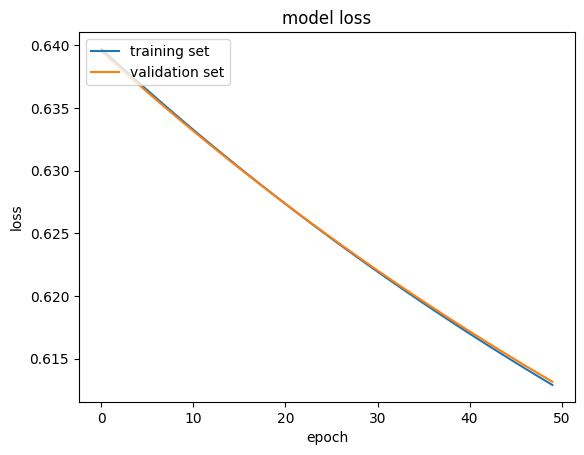

In [89]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']


plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

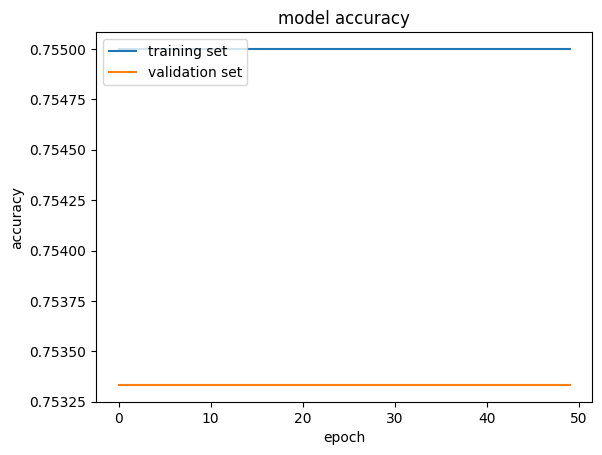

In [90]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [92]:
sentence = ["simples novo layout"]
sentence = vectorizer.transform(sentence)
if model.predict(sentence) > 0.5 :
  print("The phase is classified as Positive")
else:
  print("The phase is classified as Negative")
model.predict(sentence)

1/1 [==============================] - 0s 41ms/step
The phase is classified as Positive
1/1 [==============================] - 0s 30ms/step


array([[0.5981416]], dtype=float32)

# Neural Network

In [93]:
model = Sequential()
model.add(layers.Dense(60, input_dim=X_train.shape[1], activation='tanh', use_bias = True, bias_initializer='ones'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 60)                732240    
                                                                 
 dense_32 (Dense)            (None, 1)                 61        
                                                                 
Total params: 732301 (2.79 MB)
Trainable params: 732301 (2.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


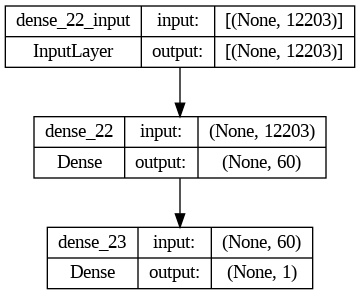

In [67]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [94]:
history_fine = model.fit(X_train, y_train,epochs=50,verbose=False,validation_data=(X_val, y_val),batch_size=X_train.shape[0])

In [95]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Train Accuracy: %0.2f' % (accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Test Accuracy: %0.2f' % (accuracy))

Train Accuracy: 0.85
Test Accuracy: 0.81


In [70]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.29      0.43       721
         1.0       0.81      0.98      0.89      2279

    accuracy                           0.81      3000
   macro avg       0.82      0.64      0.66      3000
weighted avg       0.82      0.81      0.78      3000



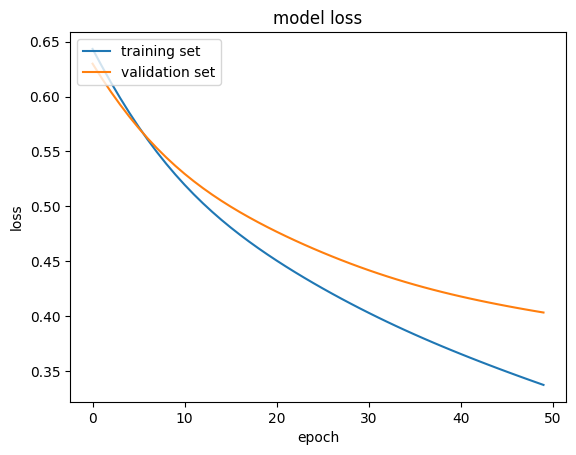

In [71]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']


plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

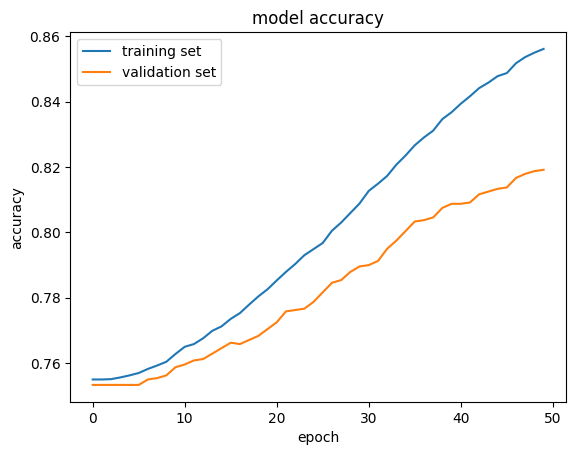

In [72]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [96]:
sentence = ["simples novo layout"]
sentence = vectorizer.transform(sentence)
if model.predict(sentence) > 0.5 :
  print("The phase is classified as Positive")
else:
  print("The phase is classified as Negative")
model.predict(sentence)

1/1 [==============================] - 0s 84ms/step
The phase is classified as Positive
1/1 [==============================] - 0s 8ms/step


array([[0.8100407]], dtype=float32)